### Population and Sample

In [1]:
import pandas as pd 
data = pd.DataFrame()

In [2]:
data['Population'] = [12,34,62,53,43,49,32,82,33]

In [3]:
var1 = data['Population'].sample(20,replace=True) #here we can have repeated values while selecting
var2 = data['Population'].sample(9,replace=False) #here we can't have repeated values while selecting
#print(var1,var2)
#type(var1)

#### We take Mean Variance and Std Deviation of our values 

In [4]:
print('Mean',data['Population'].mean())
print('Var',data['Population'].var(ddof=0))
print('Std',data['Population'].std(ddof=0))
print('Size',data['Population'].shape[0])

Mean 44.44444444444444
Var 362.46913580246905
Std 19.038622213870127
Size 9


In [5]:
# Just Checking if the empirical 68-95-99 rule is applicable here :-)
#import matplotlib as plt
#Mean = data['Population'].mean()
#Std = data['Population'].std(ddof=0)
#count = 0
#for i in data['Population']:
#    if Mean-2*Std<i<Mean+2*Std:
#        count += 1
#        print(i)
#print(count/len(data['Population']))        

#### We take the same values for our sample data where we enabled replacement.  Note that .var(ddof=1) i.e while calculating variance we took n-1 in denominator instead of n
#### Here is a video to help you understand the statistical concept better[here](https://www.youtube.com/watch?v=wpY9o_OyxoQ)

In [6]:
print('Mean',var1.values.mean())
print('Var',var1.values.var(ddof=1))
print('Std',var1.values.std(ddof=1))
print('Size',var1.shape[0])

Mean 46.85
Var 543.9236842105263
Std 23.322171515759983
Size 20


#### We create two lists containing variance of 50 samples selected from our 9 population values. We repeat it so that we have 500 such values in each list. One with ddof=0 the other with ddof=1.

In [7]:
sample_length = 500
collection1  = [data['Population'].sample(50,replace=True).var(ddof=0) for i in range(sample_length)] 
collection2  = [data['Population'].sample(50,replace=True).var(ddof=1) for i in range(sample_length)]

In [8]:
print('Population Variance',data['Population'].var(ddof=0))
print('Avg variance when ddof=0',pd.DataFrame(collection1)[0].mean())
print('Avg variance when ddof=1',pd.DataFrame(collection2)[0].mean())

Population Variance 362.46913580246905
Avg variance when ddof=0 348.32953999999995
Avg variance when ddof=1 361.6241542857142


#### We observe ddof=1 works better 

In [9]:
# We want to test some theories regarding the moment of some particular stock price, commodity price or 
# any type of prediction that we have made regarding some portfolio.

In [10]:
import numpy as np  
fstsample = pd.DataFrame(np.random.normal(10,5,size=30)) 
#print(fstsample)

In [11]:
print('Mean',fstsample[0].mean())
print('StdDev',fstsample[0].std(ddof=1))

Mean 11.724766309983796
StdDev 5.237325528535337


In [12]:
meanlist = []
varlist = []
for i in range(1000):
    fstsample = pd.DataFrame(np.random.normal(10,5,size=30)) 
    meanlist.append(fstsample[0].mean())
    varlist.append(fstsample[0].var(ddof=1))

In [13]:
collection = pd.DataFrame()
collection['Mean Value'] = meanlist
collection['VarList Value'] = varlist

In [14]:
collection[0:2]

,Mean Value,VarList Value
0,9.990423,20.085562
1,8.572862,33.313243


In [15]:
# we plot the histogram of mean values and find that it almost fits normal distribution 

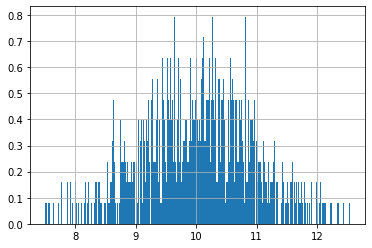

In [16]:
collection['Mean Value'].hist(bins=400,density=1)

In [17]:
# However when we plot the histogram forthe variance values we find that it is skewed to the 
# right cmpared to the normal distribution

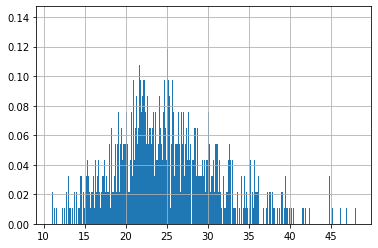

In [18]:
collection['VarList Value'].hist(bins=400,density=1)

In [19]:
# we compare the distribution of values of a particular sample and the mean 
# notice that with the rise of number of samples ,we approximately get the normal distribution from the values 

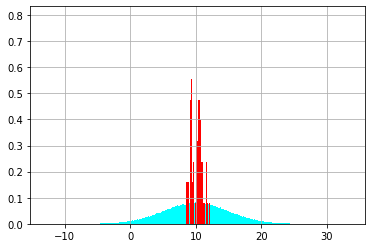

In [20]:
pop = pd.DataFrame(np.random.normal(10,5,size=500000))
pop[0].hist(color='cyan',bins=400,density=1)
collection['Mean Value'].hist(bins=400,density=1,color='red')

In [21]:
# This is the Central limit Theorem
# Take another example
# First we gona take a small sample size 

In [22]:
sample = []
apop = pd.DataFrame([1,0,1,0,1])
for t in range(100000):
    samples = apop[0].sample(10,replace=True)
    sample.append(samples.mean())

acollec = pd.DataFrame()
acollec['MeanVal'] = sample

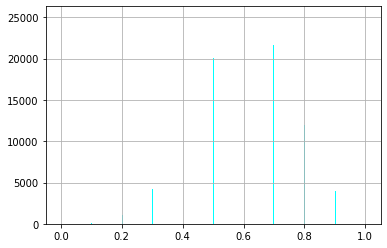

In [23]:
acollec['MeanVal'].hist(bins=400,color ='cyan')

In [24]:
# Now we take a bigger sample size

In [25]:
sample = []
apop = pd.DataFrame([1,0,1,0,1])
for t in range(100000):
    samples = apop[0].sample(2000,replace=True)
    sample.append(samples.mean())

acollec = pd.DataFrame()
acollec['MeanVal'] = sample

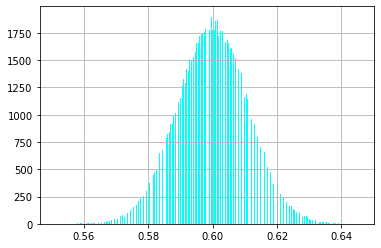

In [26]:
acollec['MeanVal'].hist(bins=400,color ='cyan')

In [27]:
# Hence we confirm the hypothesis of the CLT

#### Pls watch this video beore proceeding forward [ Redirect ](https://www.youtube.com/watch?v=4R8xm19DmPM)

In [28]:
# Read This First 
# We basically want to predict whether a stock is worth investing in, given its history.
# We will import the Stock Data Values of Facebook into a DataFrame
# Then we will calculate the the profit or loss made by a person who buys 1 facebook stock in the morning and sells it in the evening.
# We take its log for convinience
# We then create a column called as LogReturn in our fb dataframe
# Now our initial Graph is ready. We now begin to Normalize the Graph so we can leverage the information we know about the normalized distribution curve to our advantage.
# We use Z = (X-mu)/sd 
# Here X is a random value from LogReturn, mu is its mean and sd is the standard deviation of LogReturn
# Notice that we don't have the Population Mean or Population Standard Deviation since our stock data encompasses only a snapshot of the time where fb stock was publicly traded.
# We take the sample mean and sample std deviation
# We then can get info as to what is the chance that we will get a positive return if we invest today

In [29]:
from scipy.stats import norm
fb = pd.read_csv(r'../Week2/fb.csv') #importing the data set having facebook stock price data
fb['LogReturn'] = np.log(fb['Close'].shift(-1))-np.log(fb['Close'])

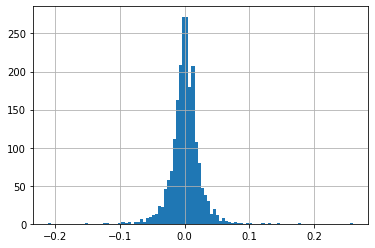

In [30]:
fb['LogReturn'].hist(bins=100)

In [31]:
# The method norm.ppf() takes a percentage and returns a standard deviation multiplier 
# for what value that percentage occurs at

In [32]:
z_left = norm.ppf(0.1) # we are asking it to provide the value at which we get 10% in a normal distribution curve 
z_right = norm.ppf(0.9) # we are asking it to provide the value at which we get 90% in a normal distribution curve 
sample_mean = fb['LogReturn'].mean() # mean of the sample 
sample_std = fb['LogReturn'].std(ddof=1)/(fb.shape[0])**0.5 # std dev of the sample as sample size is large
#print(z_left)
#print(z_right)

In [33]:
interval_left = sample_mean+z_left*sample_std # since Z = (X-mu)/sd , X = Z*sd + mu
interval_right = sample_mean+z_right*sample_std # # since Z = (X-mu)/sd , X = Z*sd + mu
print('80% confidence interval is ')
print(interval_left,interval_right)

80% confidence interval is 
0.00027153725424113094 0.0015848683452107139


In [34]:
# Since our Interval is positive, it means that stock price is likely to rise.
# There is a 80% chance that our LogReturn value for tomorrow will fall inside this range 

#### Skip This Part Till you see X if you already know how to normalize a distribution curve

In [35]:
#print(fb['LogReturn'].std(ddof=1))
#l = [4,4,6,8,8]
#l = pd.DataFrame(l)
#e = []
#for i in range(1000):
#    val = pd.DataFrame(l.sample(1000,replace=True))
#    mean = e.append(val.mean())
#df = pd.DataFrame(e)   

In [36]:
#df.hist(bins=100)
#print(df.mean())

In [37]:
#for i in range(len(e)):
#    e[i] = e[i]-df.mean()
#    e[i] = e[i]/df.std(ddof=1)
#print(e[:10])    

In [38]:
#df2 = pd.DataFrame(e)

In [39]:
#df2.hist(bins=100)
#print(df2.mean())

In [40]:
#val1 = norm.ppf(0.1)
#print(val1)

#### ----------------------------X-----------------------------

#### We now move on to the final module

In [41]:
# We want to propose some hypothesis related to the performance of a particular stock.
# We hypothesize that the average return of the facebook stock is 0.
# We make this hypothesis based on the visual graphs that we see below

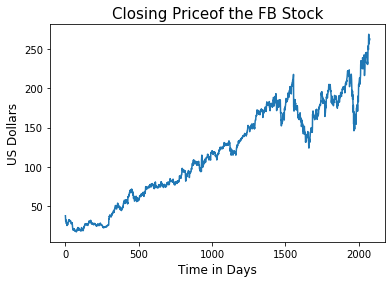

In [42]:
import matplotlib.pyplot as plt
plt.title('Closing Priceof the FB Stock',size =15)
plt.xlabel('Time in Days',size=12)
plt.ylabel('US Dollars',size=12)
plt.plot(fb.loc[:,'Close'])

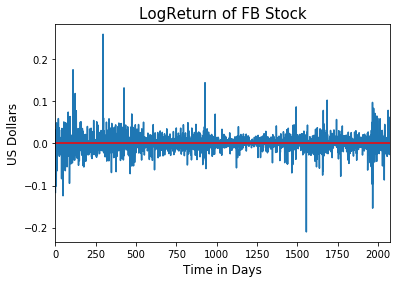

In [43]:
plt.title('LogReturn of FB Stock',size =15)
plt.xlabel('Time in Days',size=12)
plt.ylabel('US Dollars',size=12)
plt.xlim(fb.index[0], fb.index[-1])
plt.plot(fb.loc[:,'LogReturn'])
plt.axhline(0,color='red')

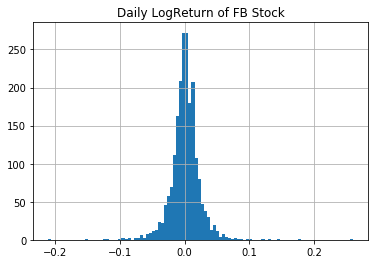

In [44]:
plt.title('Daily LogReturn of FB Stock')
fb.loc[:,'LogReturn'].dropna().hist(bins=100)

In [45]:
# Conclusions that can be drawn by looking at the graphs
# The Facebook Stock tends to go up as a whole for some period of years
# The Daily Return from the past years is not following any trend or pattern

In [46]:
# We now make a suitable hypothesis as to what is the avg value of return obtained everyday
# It is not obvious from the chart whether  it is 0,+ve or -ve.
# We make Null hypothesis that avg return value is 0
# Its opposite is that it is not 0. This is Alternative hypothesis.

In [47]:
# let mu be the avg return value predicted by first hypothesis (population parameter).
# Let X be the actual avg return value (sample statistic).
# If (X-mu) is significant, then the Alternative hypothesis is true.
# How to know how much difference is significant,is the critical question.

In [48]:
# First we standardize the return value as for a large sample size our variance is always large and hence we might mistake a non significantvalue for a significant one.
# To standardize we subtract the population mean and divide it by standard deviation
# Z = (x-mu)/sd
# In most cases we dont know the value of sd of population, So we replace it with sd of sample
# The term is then called t = (x-mu)/sd(sample)
# If the sample size is large , we can consider t same as Z

In [49]:
xbar = fb['LogReturn'].mean()
sd = fb['LogReturn'].std(ddof=1)
n = fb.shape[0]
zhat = (xbar-0)/(sd/(n**0.5))
print(zhat)

1.8114849474148131


In [50]:
# What this indicates is that we thought our normalized curve would have a mean return of 0 , however the curve has the value at 1.8114

In [51]:
alpha = 0.1
left_limit = norm.ppf(alpha/2,0,1)
right_limit = -left_limit
print(right_limit,left_limit)
print(f'We selected alpha as ',alpha*100,'%')
print(f'Whether to reject our null hypothesis: ',(zhat<left_limit or zhat>right_limit))

1.6448536269514729 -1.6448536269514729
We selected alpha as  10.0 %
Whether to reject our null hypothesis:  True


In [52]:
# This is the two tail test

In [53]:
print(right_limit,left_limit)
print(f'We selected alpha as ',alpha*100,'%')
print(f'Whether to reject our null hypothesis: ',zhat>right_limit)

1.6448536269514729 -1.6448536269514729
We selected alpha as  10.0 %
Whether to reject our null hypothesis:  True


In [54]:
# This is the one tail test that we used to find if our mean return value is greater than the given alpha

In [55]:
# We generally use the P value to determine whether our hypothesis that is true for a sample size, will also be true for population size.

In [56]:
alpha = 0.05
p = 1-(norm.cdf(abs(zhat),0,1))
print('At significance level',alpha)
print('Should we reject',p<alpha)

At significance level 0.05
Should we reject True


### ------------------------------End-------------------------------- 